In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

df = pd.read_csv("US_Accidents_March23.csv") 
df.head(3)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day


In [33]:
df.drop(columns=['Precipitation(in)', 'Sunrise_Sunset', 'Wind_Chill(F)', 'Number','Nautical_Twilight', 'Civil_Twilight', 'Astronomical_Twilight','End_Time', 'Weather_Timestamp', 'Zipcode', 'Street', 'Description', 'Country','City', 'County', 'Timezone','End_Lat','End_Lng'], inplace=True, errors='ignore')
df.head(3)

,ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),State,Airport_Code,Temperature(F),...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Hour
0,A-1,Source2,3,2016-02-08 05:46:00,39.865147,-84.058723,0.01,OH,KFFO,36.9,...,False,False,False,False,False,False,False,False,False,5
1,A-2,Source2,2,2016-02-08 06:07:59,39.928059,-82.831184,0.01,OH,KCMH,37.9,...,False,False,False,False,False,False,False,False,False,6
2,A-3,Source2,2,2016-02-08 06:49:27,39.063148,-84.032608,0.01,OH,KI69,36.0,...,False,False,False,False,False,False,False,True,False,6


/var/folders/_w/1y8vk06d52593m3blw5j8x2w0000gn/T/ipykernel_3159/1914450793.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis')


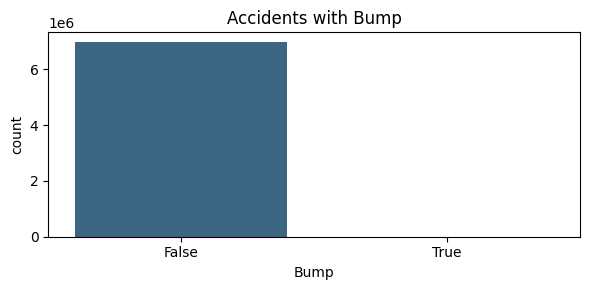

/var/folders/_w/1y8vk06d52593m3blw5j8x2w0000gn/T/ipykernel_3159/1914450793.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis')


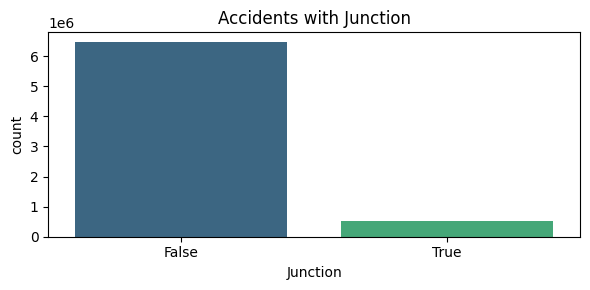

/var/folders/_w/1y8vk06d52593m3blw5j8x2w0000gn/T/ipykernel_3159/1914450793.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis')


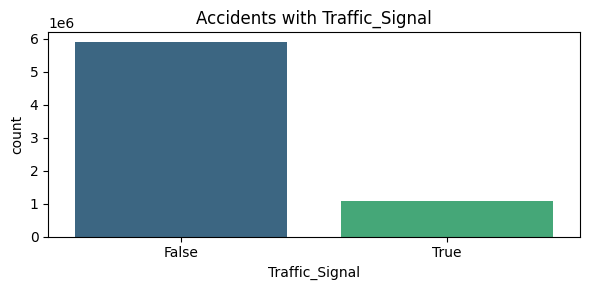

/var/folders/_w/1y8vk06d52593m3blw5j8x2w0000gn/T/ipykernel_3159/1914450793.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis')


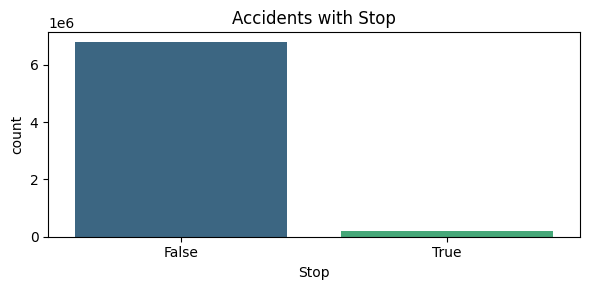

/var/folders/_w/1y8vk06d52593m3blw5j8x2w0000gn/T/ipykernel_3159/1914450793.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis')


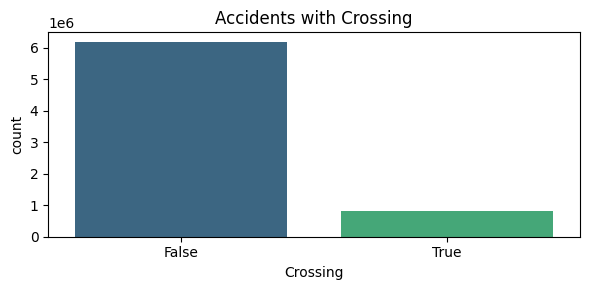

/var/folders/_w/1y8vk06d52593m3blw5j8x2w0000gn/T/ipykernel_3159/1914450793.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='viridis', legend=False)


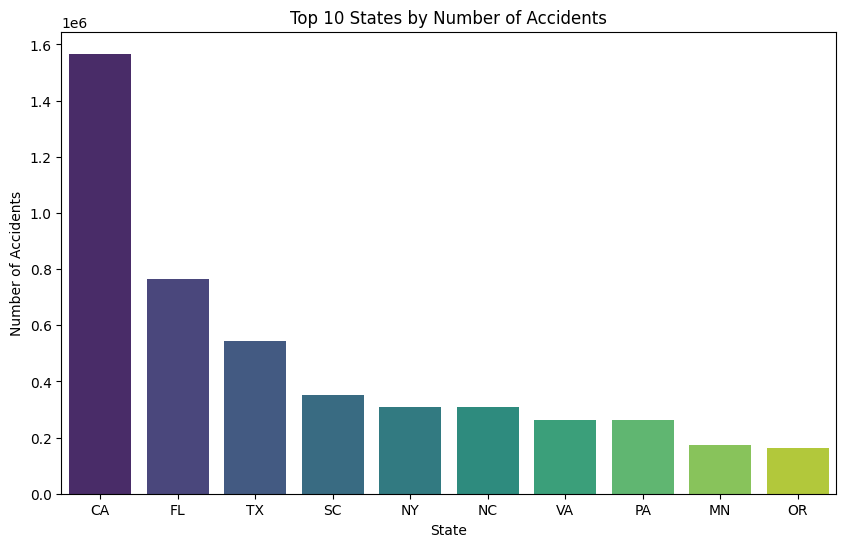

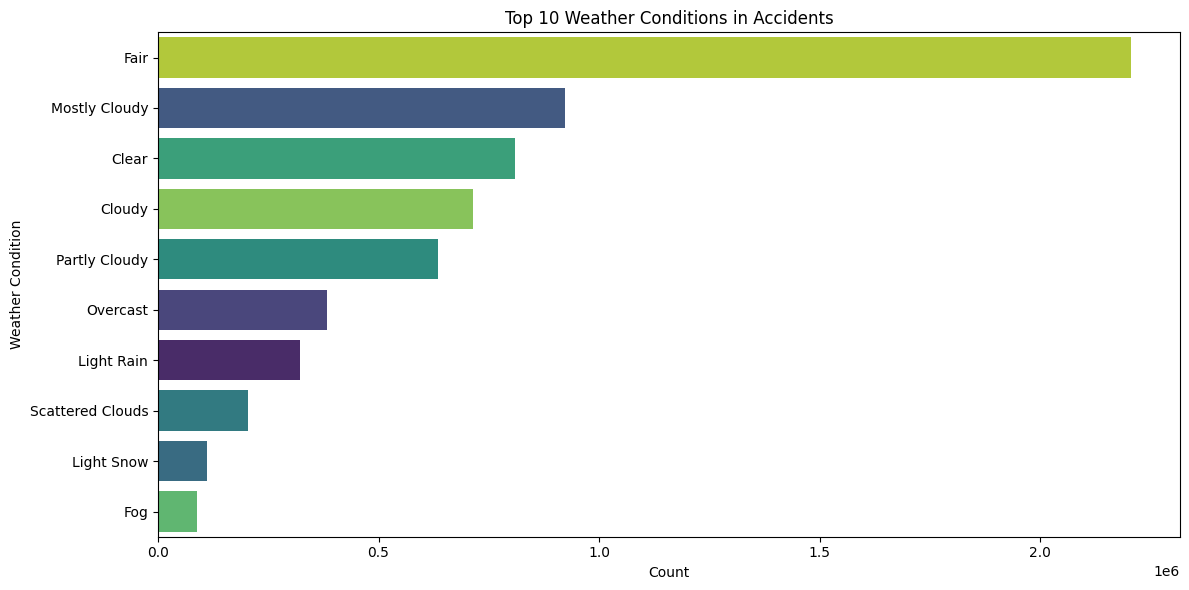

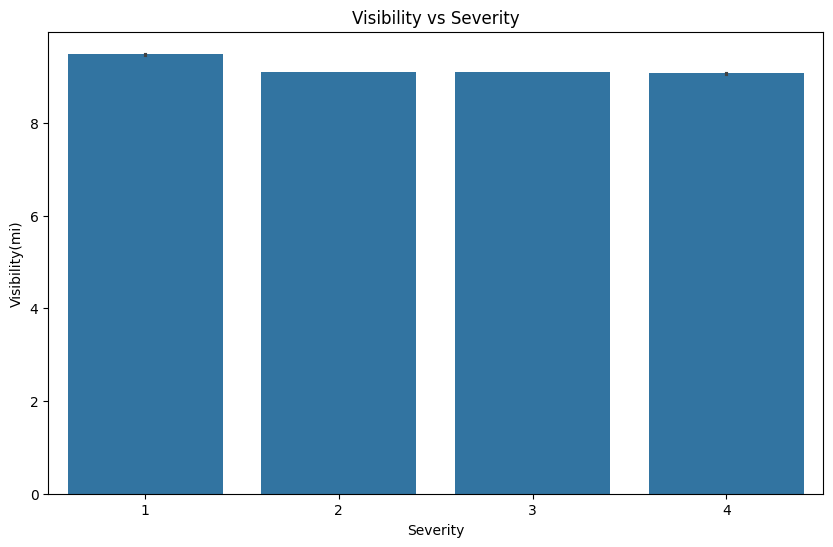

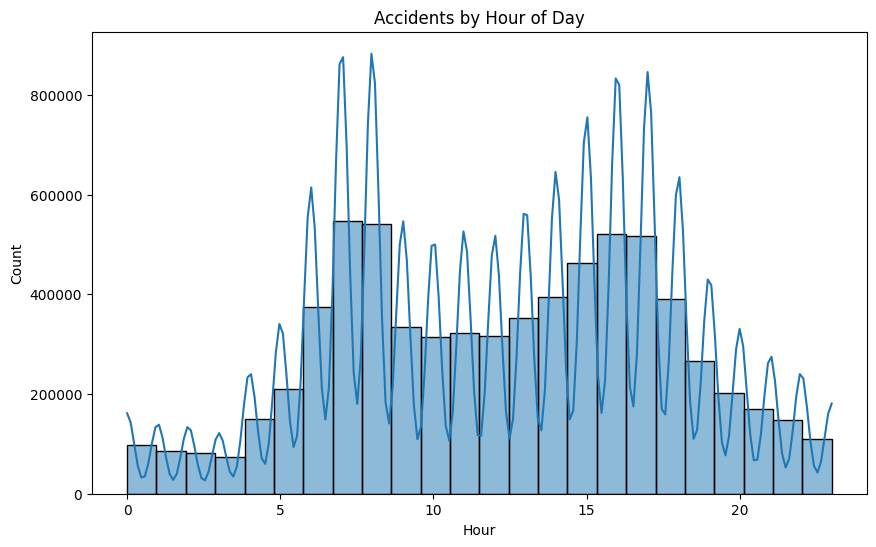

<Figure size 1000x600 with 0 Axes>

In [46]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df = df.dropna(subset=['Start_Time'])

#Plot 1
road_features = ['Bump', 'Junction', 'Traffic_Signal', 'Stop', 'Crossing']
for feature in road_features:
    if feature in df.columns:
        plt.figure(figsize=(6, 3))
        sns.countplot(x=feature, data=df, palette='viridis')
        plt.title(f'Accidents with {feature}')
        plt.tight_layout()
        plt.show()
plt.figure(figsize=(10, 6))
top_states = df['State'].value_counts().head(10)
sns.barplot(x=top_states.index, y=top_states.values, palette='viridis', legend=False)
plt.title("Top 10 States by Number of Accidents")
plt.ylabel("Number of Accidents")
plt.xlabel("State")
plt.show()

#Plot2
top_weather = df['Weather_Condition'].value_counts().head(10).index
weather_df = df[df['Weather_Condition'].isin(top_weather)]
plt.figure(figsize=(12, 6))
sns.countplot(y='Weather_Condition', data=weather_df, order=top_weather, hue='Weather_Condition', palette='viridis')
plt.title('Top 10 Weather Conditions in Accidents')
plt.xlabel('Count')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()

#Plot 3
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Severity', y='Visibility(mi)')
plt.title("Visibility vs Severity")
plt.show()

#Plot 4
plt.figure(figsize=(10, 6))
sns.histplot(df['Hour'], bins=24, kde=True)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.show()

# Plot 5
plt.figure(figsize=(10, 6))
heat_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(10000)
m = folium.Map(location=[37, -95], zoom_start=5)
HeatMap(data=heat_df.values, radius=8).add_to(m)
